In [ ]:
Original LDA

In [4]:

# ----- Linear discriminant analysis -----
import os
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
# Data Load & Preprocessing
data = pd.read_csv(os.path.join(os.path.join(os.path.abspath(''), os.pardir), 'C:/Desktop/abalone.csv'))
data = data.iloc[0:100,:]
df = pd.DataFrame.as_matrix(data)
y = df[:,0]
from sklearn.preprocessing import LabelEncoder
enc = LabelEncoder()
label_encoder = enc.fit(y)
y = label_encoder.transform(y) + 1
label_dict = {1: 'A', 2: 'I'}
X = df[:,1:]
nrow = X.shape[0]
ncol = X.shape[1]
cg = np.unique(y)
for i in range(X.shape[0]):
    if y[i] == cg[0]:
        y[i] = 1
    else:
        y[i] = 2

y = y.astype(int)


feature_dict = {i:label for i,label in zip(
                range(ncol),
                  ('Length',
                  'Diameter',
                  'Height',
                  'Whole_Weiht',
                  'Shucked_Weight',
                  'Viscera_Weight',
                  'Shell_Weight',
                  'Rings'))}

FileNotFoundError: File b'C:/Desktop/abalone.csv' does not exist

In [ ]:
# Histograms and feature selection
# Just to get a rough idea how the samples of our three classes ω1ω1, ω2ω2 are distributed, 
# let us visualize the distributions of the four different features in 1-dimensional histograms.

fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(12,6))
for ax,cnt in zip(axes.ravel(), range(ncol)):  
    # set bin sizes
    min_b = math.floor(np.min(X[:,cnt]))
    max_b = math.ceil(np.max(X[:,cnt]))
    bins = np.linspace(min_b, max_b, 25)

    # plottling the histograms
    for lab,col in zip(range(1,3), ('blue', 'red')):
        ax.hist(X[y==lab, cnt],
                   color=col,
                   label='class %s' %label_dict[lab],
                   bins=bins,
                   alpha=0.5,)
    ylims = ax.get_ylim()

    # plot annotation
    leg = ax.legend(loc='upper right', fancybox=True, fontsize=8)
    leg.get_frame().set_alpha(0.5)
    ax.set_ylim([0, max(ylims)+2])
    ax.set_xlabel(feature_dict[cnt])
    ax.set_title('Abalon histogram #%s' %str(cnt+1))

    # hide axis ticks
    ax.tick_params(axis="both", which="both", bottom="off", top="off",  
            labelbottom="on", left="off", right="off", labelleft="on")

    # remove axis spines
    ax.spines["top"].set_visible(False)  
    ax.spines["right"].set_visible(False)
    ax.spines["bottom"].set_visible(False)
    ax.spines["left"].set_visible(False)    

axes[0][0].set_ylabel('count')
axes[1][0].set_ylabel('count')
fig.tight_layout()       
plt.show()


In [2]:

# Step 1 of LDA: Computing the d-dimensional mean vectors
np.set_printoptions(precision=4)
mean_vectors = []
for cl in range(1,3):
    mean_vectors.append(np.mean(X[y==cl], axis=0))
    print('Mean Vector class %s: %s\n' %(cl, mean_vectors[cl-1]))

NameError: name 'X' is not defined

In [22]:
# Step 2 of LDA: computing the Scatter matrices S_W, S_B
# within-class scatter matrix Sw
S_W = np.zeros((ncol,ncol))
for cl,mv in zip(range(1,3), mean_vectors):
    class_sc_mat = np.zeros((ncol,ncol))                  # scatter matrix for every class
    for row in X[y == cl]:
        row, mv = row.reshape(ncol,1), mv.reshape(ncol,1) # make column vectors
        class_sc_mat += ((row-mv).dot((row-mv).T)).astype('float64')
    S_W += class_sc_mat                             # sum class scatter matrices
print('within-class Scatter Matrix:\n', S_W)
# Between-class scatter matrix Sb
overall_mean = np.mean(X, axis=0)
S_B = np.zeros((ncol,ncol))
for i,mean_vec in enumerate(mean_vectors):  
    n = X[y==i+1,:].shape[0]
    mean_vec = mean_vec.reshape(ncol,1) # make column vector
    overall_mean = overall_mean.reshape(ncol,1) # make column vector
    S_B += (n * (mean_vec - overall_mean).dot((mean_vec - overall_mean).T)).astype('float64')
print('between-class Scatter Matrix:\n', S_B)


('within-class Scatter Matrix:\n', array([[  6.5125e-01,   5.2082e-01,   1.9320e-01,   2.5094e+00,
          9.2855e-01,   5.3499e-01,   7.9381e-01,   1.5517e+01],
       [  5.2082e-01,   4.3497e-01,   1.6071e-01,   2.1163e+00,
          7.7604e-01,   4.4294e-01,   6.7507e-01,   1.2812e+01],
       [  1.9320e-01,   1.6071e-01,   7.3998e-02,   8.2093e-01,
          2.9262e-01,   1.7748e-01,   2.6719e-01,   4.9270e+00],
       [  2.5094e+00,   2.1163e+00,   8.2093e-01,   1.1848e+01,
          4.2757e+00,   2.4283e+00,   3.7965e+00,   7.0958e+01],
       [  9.2855e-01,   7.7604e-01,   2.9262e-01,   4.2757e+00,
          1.6793e+00,   9.3475e-01,   1.2686e+00,   2.4865e+01],
       [  5.3499e-01,   4.4294e-01,   1.7748e-01,   2.4283e+00,
          9.3475e-01,   5.9644e-01,   7.0425e-01,   1.3199e+01],
       [  7.9381e-01,   6.7507e-01,   2.6719e-01,   3.7965e+00,
          1.2686e+00,   7.0425e-01,   1.3513e+00,   2.4831e+01],
       [  1.5517e+01,   1.2812e+01,   4.9270e+00,   7.0958e+01

In [23]:
#Step 3 of LDA: Solving the generalized eigenvalue problem for the matrix SW−1SB
#:Next, we will solve the generalized eigenvalue problem 
# for the matrix S−1WSBSW−1SB to obtain the linear discriminants.

eig_vals, eig_vecs = np.linalg.eig(np.linalg.inv(S_W).dot(S_B))
for i in range(len(eig_vals)):
    eigvec_sc = eig_vecs[:,i].reshape(ncol,1)   
    print('\nEigenvector {}: \n{}'.format(i+1, eigvec_sc.real))
    print('Eigenvalue {:}: {:.2e}'.format(i+1, eig_vals[i].real))
#Checking the eigenvector-eigenvalue calculation
#A quick check that the eigenvector-eigenvalue calculation is correct and satisfy the equation:
#Av=λv #where #A=S−1WSB #v=Eigenvector #λ=Eigenvalue

for i in range(len(eig_vals)):
    eigv = eig_vecs[:,i].reshape(ncol,1)
    np.testing.assert_array_almost_equal(np.linalg.inv(S_W).dot(S_B).dot(eigv),
                                         eig_vals[i] * eigv,
                                         decimal=6, err_msg='', verbose=True)
print('ok')




Eigenvector 1: 
[[ 0.1841]
 [-0.9137]
 [-0.3267]
 [ 0.139 ]
 [-0.0704]
 [ 0.01  ]
 [ 0.0121]
 [-0.0016]]
Eigenvalue 1: 1.08e+00

Eigenvector 2: 
[[ -1.6215e-01]
 [  8.0707e-01]
 [  4.1816e-01]
 [ -2.4582e-01]
 [  1.7210e-01]
 [  1.1628e-01]
 [ -2.0957e-01]
 [  1.6692e-04]]
Eigenvalue 2: -9.06e-15

Eigenvector 3: 
[[ -2.9563e-01]
 [ -5.1287e-01]
 [  1.9011e-01]
 [ -9.5576e-02]
 [  1.6946e-01]
 [  7.9476e-02]
 [  7.5449e-01]
 [ -1.0619e-04]]
Eigenvalue 3: -2.46e-15

Eigenvector 4: 
[[ 0.2253]
 [ 0.1164]
 [ 0.4628]
 [ 0.0334]
 [ 0.2382]
 [-0.322 ]
 [-0.7483]
 [ 0.0028]]
Eigenvalue 4: -1.23e-15

Eigenvector 5: 
[[  1.6468e-03]
 [  5.0371e-01]
 [  3.6273e-01]
 [ -1.2816e-03]
 [ -1.0768e-01]
 [ -1.4986e-01]
 [ -3.3539e-01]
 [  3.6704e-04]]
Eigenvalue 5: 3.65e-16

Eigenvector 6: 
[[  1.6468e-03]
 [  5.0371e-01]
 [  3.6273e-01]
 [ -1.2816e-03]
 [ -1.0768e-01]
 [ -1.4986e-01]
 [ -3.3539e-01]
 [  3.6704e-04]]
Eigenvalue 6: 3.65e-16

Eigenvector 7: 
[[-0.3209]
 [ 0.8211]
 [ 0.2653]
 [-0.0338]
 [

In [24]:
# Step 4 of LDA: Selecting linear discriminants for the new feature subspace
# 4.1 sorting the eigenvectors by decreasing eigenvalues
# Make a list of (eigenvalue, eigenvector) tuples
eig_pairs = [(np.abs(eig_vals[i]), eig_vecs[:,i]) for i in range(len(eig_vals))]
# Sort the (eigenvalue, eigenvector) tuples from high to low
eig_pairs = sorted(eig_pairs, key=lambda k: k[0], reverse=True)
# Now, let’s express the “explained variance” as percentage:
print('Variance explained:\n')
eigv_sum = sum(eig_vals)
for i,j in enumerate(eig_pairs):
    print('eigenvalue {0:}: {1:.2%}'.format(i+1, (j[0]/eigv_sum).real))
    
# Visually confirm that the list is correctly sorted by decreasing eigenvalues
print('Eigenvalues in decreasing order:\n')
for i in eig_pairs:
    print(i[0])
# Now, let’s express the “explained variance” as percentage:
print('Variance explained:\n')
eigv_sum = sum(eig_vals)
for i,j in enumerate(eig_pairs):
    print('eigenvalue {0:}: {1:.2%}'.format(i+1, (j[0]/eigv_sum).real))
# 4.2 Choosing k eigenvectors with the largest eigenvalues
W = np.hstack((eig_pairs[0][1].reshape(ncol,1), eig_pairs[1][1].reshape(ncol,1)))
W = W.astype('float32')
print('Matrix W:\n', W.real)
X_lda = X.dot(W)


Variance explained:

eigenvalue 1: 100.00%
eigenvalue 2: 0.00%
eigenvalue 3: 0.00%
eigenvalue 4: 0.00%
eigenvalue 5: 0.00%
eigenvalue 6: 0.00%
eigenvalue 7: 0.00%
eigenvalue 8: 0.00%
Eigenvalues in decreasing order:

1.08224933372
9.05997177714e-15
2.45546484718e-15
2.396348724e-15
2.396348724e-15
1.23390229836e-15
6.26112303442e-16
6.26112303442e-16
Variance explained:

eigenvalue 1: 100.00%
eigenvalue 2: 0.00%
eigenvalue 3: 0.00%
eigenvalue 4: 0.00%
eigenvalue 5: 0.00%
eigenvalue 6: 0.00%
eigenvalue 7: 0.00%
eigenvalue 8: 0.00%
('Matrix W:\n', array([[  1.8414e-01,  -1.6215e-01],
       [ -9.1369e-01,   8.0707e-01],
       [ -3.2672e-01,   4.1816e-01],
       [  1.3897e-01,  -2.4582e-01],
       [ -7.0397e-02,   1.7210e-01],
       [  9.9679e-03,   1.1628e-01],
       [  1.2120e-02,  -2.0957e-01],
       [ -1.5666e-03,   1.6692e-04]], dtype=float32))


C:\Users\dmqm171\AppData\Local\conda\conda\envs\python2\lib\site-packages\ipykernel_launcher.py:24: ComplexWarning: Casting complex values to real discards the imaginary part


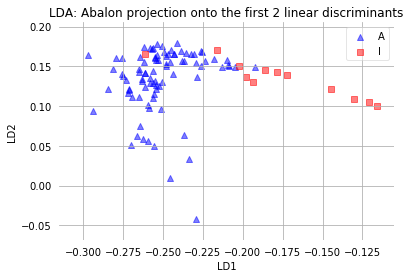

In [25]:
def plot_step_lda():

    ax = plt.subplot(111)
    for label,marker,color in zip(
        range(1,3),('^', 's'),('blue', 'red')):

        plt.scatter(
                x=X_lda[:,0].real[y == label],
                y=X_lda[:,1].real[y == label],
                marker=marker,
                color=color,
                alpha=0.5,
                label=label_dict[label]
                )

    plt.xlabel('LD1')
    plt.ylabel('LD2')

    leg = plt.legend(loc='upper right', fancybox=True)
    leg.get_frame().set_alpha(0.5)
    plt.title('LDA: Abalon projection onto the first 2 linear discriminants')

    # hide axis ticks
    plt.tick_params(axis="both", which="both", bottom="off", top="off",  
            labelbottom="on", left="off", right="off", labelleft="on")

    # remove axis spines
    ax.spines["top"].set_visible(False)  
    ax.spines["right"].set_visible(False)
    ax.spines["bottom"].set_visible(False)
    ax.spines["left"].set_visible(False)    

    plt.grid()
    plt.tight_layout
    plt.show()

plot_step_lda()

